# Midterm T1 2017

In [181]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

Sorakris Chaladlamsakul 5880068

The midterm consists of two parts: 

 - **Easy Zone** which worth 100 point each which most of them you can just copy from exercise/homework
 - **Creative zone** which worth 150 points each.
 - The score for each sub question is equal unless indicated.
 - Comment your code!! If it takes me more than 5 minutes to figure out what your code does, I won't grade it.
 
 The total score is 900 but you will be graded out of 0.9*900=810.

# Easy Stuff (100 Each)

### 1 Taylor Series

1) Find the first 3 *non-zero* terms in Taylor series of
$$f(x) = \frac{1}{2-x}$$

expand around x = 1

$$
    f(1+x) = \frac{1}{2-(1+x)}
$$
$$
    f(1+x) = \frac{1}{1-x}
$$

$$
    \frac{1}{1-x} = 1 + x +x^2
$$

In [105]:
def f(x):
    return 1+x+x**2


2) Use the Taylor series you found in 1) to find $$\frac{1}{0.8}$$ **along with bound on error**.

In [110]:
approx =f(0.2)
print("1/0.8 is around",approx)
err =(6/(1-0.2)**4)*(0.2)**3/math.factorial(3)
print("error:",err, "upper bound:", approx +err, "lower bound:", approx-err)

1/0.8 is around 1.24
error: 0.01953125 upper bound: 1.25953125 lower bound: 1.22046875


### 2 Bisection (100)

We can find euler number $e$ by solving equation.

$\ln x = 1$




1) If we want to find $e$ by bisection with starting bound of [2,3], how many iteration do we need to get it acuurate to $10^{-6}$

In [60]:
print("iteration >", math.log2(1/(10**-6))-1)

iteration > 18.931568569324174


ANS: 19

2) Find $e$ that is accurate up to $10^{-6}$.

In [61]:
def bisection(f, l, r,n):
    left = l
    right = r
    mid = (l+r)/2.0
    assert(f(left)*f(right) < 0)
    for i in range(n):
        mid = (left+right)/2.0
        if (f(mid)* f(left) < 0):
            right = mid
        else:
            left = mid
    return mid
def g(x):
    return math.log(x ,math.e) -1
print(bisection(g, 2, 3, 19))

2.718282699584961


### 3. Newton's method (100)

1) Find Newton's method update rule for solving

$\sin(x) + e^x + \cos(x) = 5$


In [62]:
def h(x) :
    return math.sin(x) +math.e**x + math.cos(x) -5
def hp(x):
    return math.cos(x) + math.e**x -math.sin(x)
def newtonMeth(x, itera):
    if itera == 0:
        return x
    else:
        return newtonMeth(x-(h(x)/hp(x)),itera-1)

    

2) Solve the above equation. Pick appropriate starting point.

In [63]:
print(newtonMeth(1,15))

1.3330574168343974


3) Draw an example when Newton's method doesn't work.

**ANS:** in zip file


### 4. Derivative (100)

1) Plot the first and second derivative of $f(x) = e^{-x} \sin(x)$

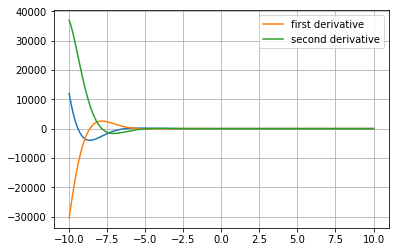

In [65]:
def f(x):
    return math.sin(x)*math.e**(-x)
def fp(x,h):
    return (f(x+h)-f(x-h))/(2*h)
def fpp(x,h):
    return (f(x + h) - 2*f(x) + f(x-h))/h**2
xx = np.linspace(-10,10,1000)
y = [f(x) for x in xx]
yp = [fp(x,0.0001) for x in xx]
ypp = [fpp(x,0.0001) for x in xx]
plt.plot(xx,y)
plt.plot(xx,yp, label ="first derivative")
plt.plot(xx,ypp, label ="second derivative")
plt.grid()
plt.legend()

2) Which formula is better for approximating $f'(x)$. Answer with no justification recieve no credit.
$$
g_1(x) = \frac{f(x+h) - 4 f(x-h) + 3 f(x)}{6h}
$$

$$
g_2(x) = \frac{f(x+2h) - 3f(x-h) + 2f(x)}{5h}
$$

$
g_1(x) = \frac{f(x+h) - 4 f(x-h) + 3 f(x)}{6h}
$

$
f(x+h) = f(x) + f'(x)h + \frac{f''(x)}{2}h^2 + \frac{f'''(\xi^+)}{3!}h^3
$

$
4f(x-h) = 4[f(x) - f'(x)h + \frac{f''(x)}{2}h^2 -\frac{f'''(\xi^-)}{3!}h^3]
$

$
= 4f(x) - 4f'(x)h + 2f''(x)h^2 -\frac{4f'''(\xi^-)}{3!}h^3
$


$$
g_1(x)= \frac{f(x) + f'(x)h + \frac{f''(x)}{2}h^2 + \frac{f'''(\xi^+)}{3!}h^3 - 4f(x) + 4f'(x)h - 2f''(x)h^2 +\frac{4f'''(\xi^-)}{3!}h^3 +3f(x)}{6h}
$$

$$
= 
$$

### 5. Legendre (100)

1) Find Legendre Polynomial which passes through all these point.

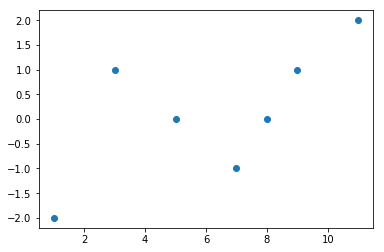

In [66]:
xs = np.array([1,3,5,7,8,9,11])
ys = np.array([-2.,1,0,-1,0,1,2])
plt.plot(xs, ys, 'o')

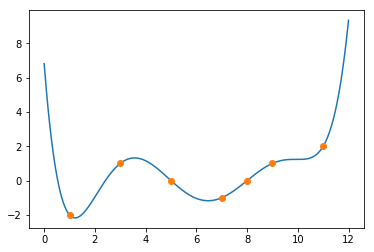

In [76]:
def legendre_generator(xs, ys):
    nterm = len(xs)
    def legendre(x):
        ans = 0
        for i in range(nterm):
            y = ys[i]
            temp=1
            for j in range(nterm):
                if (j!=i):
                    temp *= (x-xs[j])/(xs[i]-xs[j])
            ans+=(y*temp)
        return ans
    return legendre
leg = legendre_generator(xs, ys)

x = np.linspace(0,12,1000)

y = [leg(xx) for xx in x]
plt.plot(x, y)
plt.plot(xs, ys, 'o')

### 6. Integral (100)

1) We want to calculate

$$\int_3^7 x^3 +1 \; dx$$

using trapezoid rule such that the answer is at most $10^{-5}$ away from the real answer how many pieces do we need?

In [121]:
def fpp(x):
    return 6*x
def findMaxM(a,b):
    lst=[]
    for i in range(a,b+1):
        lst.append(abs(fpp(i)))
    return max(lst)
def trapError(a,b,approx):
    return math.sqrt(((b-a)**3) *findMaxM(a,b) /(12*approx))

print("n >=", trapError(3, 7, 10**-5))


n >= 4732.863826479693


2) Use trapezoid rule to calculate
$$\int_3^7 x^3 + 1 \; dx$$
such that your answer is at most $10^{-5}$ from the real answer.



In [80]:
def f6(x):
    return 1 + x**3
def TrapezoidRule(f, a, b, n):
    h=(b-a)/n
    summ=0
    for i in range(1,n):
        summ+=f(a+i*h)
    return (h/2)*(f(a)+f(b)) + h*summ
print("AREA: ", TrapezoidRule(f6, 3, 7, 4733))

AREA:  584.0000071424486


# Creative Stuff (It's actually easier than you think.)

### 7. The other Legendre Polynomial.

Legendre did so many things in the past sometimes we have name clash. This is a different one from what we learned in class. This Legendre Polynomial shows up many places in Physics, Engineering and data analysis. https://en.wikipedia.org/wiki/Legendre_polynomials

In the homework we did fourier series where we found we can approximate complex function as a sum of sine and cosine. We can do the same thing, but instead of using sine and cosine. We will be using (the other) Legendre Polynomail. Let us get started.

Legendre polynomial can be computed recursively by using the following recurrence formula:
$$
    P_0(x) = 1 \\
    P_1(x) = x
$$
and 
$$
    P_{n+1} = \frac{1}{n+1}\left[(2n+1)xP_n(x) - nP_{n-1}(x)\right]
$$
or equivalently(this is easier for coding)
$$
    P_{n} = \frac{1}{n}\left[ (2n-1) x P_{n-1}(x) - (n-1)P_{n-2}(x)\right]
$$

$triangle = 1 -|x|$

**Task 1** Write a function $P(x, n)$ which computes $P_n(x)$. Check your answer by plotting your $P(x, 4)$ against 
$$P_4(x) = \frac{1}{8}(35x^4-30x^2+3)$$ 
there are couple more for you to check given on wikipedia.

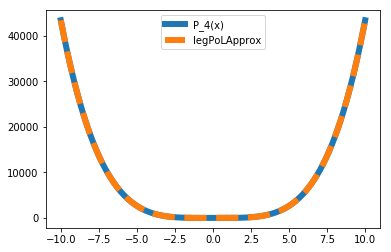

In [117]:
def P4(x):
    return (1/8)*(35*x**4 - 30*x**2 +3)
def P(x, n):
    if n == 0:
        return 1
    if n == 1:
        return x
    else:
        return (1/n)*( (2*n - 1)*x*P(x,n-1) - (n-1)*P(x,n-2) )
x7 = np.linspace(-10,10,1000)
yp4 = [P4(x) for x in x7]
ypn4 = [P(x,4) for x in x7]
plt.plot(x7,yp4, lw = 6, label="P_4(x)")
plt.plot(x7,ypn4, lw=6,ls = "dashed", label="legPoLApprox")
plt.legend()

**Task 2** Legendre Polynomial has a very nice property that is
$$
\int_{-1}^{1} P_n(x)P_m(x) \; dx = \begin{cases} 
0 & \text{if }n\neq m \\
\frac{2}{2n+1} & \text{if } n = m
\end{cases}
$$

We know something about how to get computer to do integral. **Numerically show that this property is true for all pairs of n,m from 0 to 4.**

Clarification: Write a function that compute the right handside quickly and compare left and right hand side. Pick a suitable number of subdivision. They should be close enough.

In [210]:
def fpp(f,x):
    return (f(x + 0.0001) - 2*f(x) + f(x-0.0001))/0.0001**2
def findMaxM(f,a,b):
    lst=[]
    for i in range(a,b+1):
        lst.append(abs(fpp(f,i)))
    return max(lst)
def trapError(f,a,b,approx):
    return math.sqrt(((b-a)**3) *findMaxM(f,a,b) /(12*approx))

def TrapezoidRule(f, a, b, n):
    h=(b-a)/n
    summ=0
    for i in range(1,n):
        summ+=f(a+i*h)
    return (h/2)*(f(a)+f(b)) + h*summ


In [211]:
allnm = [ (i,j) for i in range(5) for j in range(5)]
# print(allnm)

def proofLegPol(allnm):
    for ech in allnm:
        
        n,m=ech
#         print(n,m)
        #righthandside
        if (n==m):
            rh = 2/(2*n+1)
        else:
            rh = 0
            
        #lefthandside
        def f(x):
            return P(x,n)*P(x,m)
        itera = int(trapError(f,-1,1,10**-5))+1
        lh = TrapezoidRule(f, -1, 1, itera)
        if (abs(rh -lh) >10**-5):
            return False
    return True

proofLegPol(allnm)   

True

**Task 3** The property we learned in Task2 is called Orthorgornality. This is actually what make fourier series magic in the homework works. This means that we can also write a complex function as a sum of Legendre Polynomials just as we did with sine and cosine in homework.

$$
    f(x) = a_0 P_0(x) + a_1 P_1(x) + a_2 P_2(x) + a_3 P_3(x) + a_4 P_4(x) + \ldots
$$

where

$$
    a_i = \frac{2i+1}{2}\int_{-1}^{1} f(x) P_i(x) dx
$$
(Bonus:(0.0000000001 Point) Prove the above formula.)

For example, an approximation of triangle function using sum of Legendre Polynomial for triangle function is shown below.
![Triangle Aproximation](leg_series.png)

**Your job: Find all the coefficient and make the plot above**

Note: up to P20 one may take a while so do up to P5 and P10 and make sure you get it right first.

In [235]:

def f73(x):
    return 1 - abs(x)
def fpp(f,x):
    return (f(x + 0.0001) - 2*f(x) + f(x-0.0001))/0.0001**2
def findMaxM(f,a,b):
    lst=[]
    for i in range(a,b+1):
        lst.append(abs(fpp(f,i)))
    return max(lst)
def trapError(f,a,b,approx):
    return math.sqrt(((b-a)**3) *findMaxM(f,a,b) /(12*approx))

def TrapezoidRule(f, a, b, n):
    h=(b-a)/n
    summ=0
    for i in range(1,n):
        summ+=f(a+i*h)
    return (h/2)*(f(a)+f(b)) + h*summ
def P(x, n):
    if n == 0:
        return 1
    if n == 1:
        return x
    else:
        return (1/n)*( (2*n - 1)*x*P(x,n-1) - (n-1)*P(x,n-2) )

def P0(x):
    i=0
    temp = P(x,i)
    def fxPi(x):
            return f73(x)*temp
    itera = int(trapError(fxPi,-1,1,10**-4))+1
    ai= ((2*i+1)/2)*TrapezoidRule(fxPi,-1,1, itera)
    return ai*temp
def P5(x):
    summ=0
    for i in range(5):
        temp = P(x,i)

        itera = int(trapError(P*temp,-1,1,10**-4))+1
        ai= ((2*i+1)/2)*TrapezoidRule(PxFx,-1,1, itera)
        summ+=ai*temp
    return summ
# xx=np.linspace(-1,1,1000)
# yy=[P5(x) for x in xx]
# plt.plot(xx,yy)
print(P5(0))
print(P0(0))

1.3828124826812755
0.5000000000000001


### 8 Ply's Buffet Restaurant. (150)

Since it's late evening and I know you are hungry. Let's do a problem about food.

Ply apple shop business is doing very well so he expands his business line to Shabu Shabu Buffet called Meme Shabu since he know how to maximize the profit using Poisson distribution. Let us assume that the number of people who wants to eat at his restaurant each day also follows poisson distribution $P(x; \lambda)$.

It's not practical to determine how many days he sell off his buffet like in his apple shop since the food can go over a day. But Ply need to find some other method to determine the parameter $\lambda$ which he can use to improve his business.

Luckily Meme Shabu has a restaurant rating card which *every customer* fills. The rating goes from 5 to 0 stars and the nature of rating customer gives goes as follow
 - First 50 people for that day will always give 5 stars(each). Since they got good service
 - Next 50 people, will give 4 stars(each).
 - Next 50 peole, will give 3 stars(each).
 - Next 50 peole, will give 2 stars(each).
 - Next 50 peole, will give 1 stars(each).
 - The rest will either give 0 star(since they didn't receive service).
 
For example, if there are 157 people who wants to eat at Meme Shabu. The total number of star would be $50*5 + 50*4 + 50*3 + 7*2$. It goes like tax bracket you did in programming 1.

Ply found that on average the **total** number of stars his Shabu restaurant gets is 500 stars. **Find $\lambda$.**

lambda = 121.3801498413086


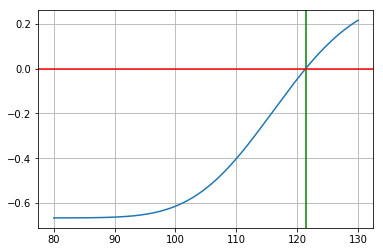

In [226]:
def poisson(k, lmd):
    return math.exp(k*math.log(lmd) - lmd -math.lgamma(k+1))
def bisection(f, l, r,n):
    left = l
    right = r
    mid = (l+r)/2.0
    assert(f(left)*f(right) < 0)
    for i in range(n):
        mid = (left+right)/2.0
        if (f(mid)* f(left) < 0):
            right = mid
        else:
            left = mid
    return mid
def calStar(people):
    tot_star=0
    count = 0
    star = 5
    while(people>0):
        if count == 50:
            star-=1
            count =0
        tot_star+=star
        people-=1
        count+=1
    return tot_star
def calPeople(star):
    tot_people = 0
    count = 0
    people = 0
    while (star>0):
        if (people<50):
            star-=5
        elif (people<100):
            star-=4

        elif (people<150):
            star-=3
        elif(people<200):
            star-=2
        elif(people<250):
            star-=1
        people+=1
    return people

def p(lam):
    expr = 1
    for k in range(0,117):
        expr-=(poisson(k,lam))
        
    return expr -(500/750)


xs = np.linspace(80,130, 1000)
px = [p(x) for x in xs]
lam = bisection(p, 120,122,18)
plt.axvline(lam, color ="g")
plt.plot(xs, px)
plt.axhline(0, color="red")
plt.grid()
print("lambda =", lam)
